<a href="https://colab.research.google.com/github/leehj2586/leehj/blob/main/OB2%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kmodes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 전처리

- 데이터 로드

In [4]:
df = pd.read_csv('/content/drive/MyDrive/OB2조/세종시 공모전/데이터/한국노인인력개발원_노인일자리 통합정보_20240528.csv', encoding = 'cp949')

### 1. 일자리 데이터

In [5]:
data = df[['사업유형코드', '목표일자리수','수행기관관활시도명', '수행기관시군구']]

In [6]:
data["사업유형"] = data["사업유형코드"].apply(lambda code: code[:-6])
data["사업유형코드"] = data["사업유형코드"].apply(lambda code: code[-5:-1])
data["사업유형알파벳"] = data["사업유형코드"].apply(lambda code: code[-5:-1].split(sep='-')[0])
data['수행기관시군구'] = data['수행기관시군구'].apply(lambda area: '소계' if (area=='직속'or area=='세종시') else area)
data['수행기관시군구'] = data['수행기관시군구'].apply(lambda area: '청주시' if '청주시' in area else area)

<ipython-input-6-cb39b22a1d5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["사업유형"] = data["사업유형코드"].apply(lambda code: code[:-6])
<ipython-input-6-cb39b22a1d5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["사업유형코드"] = data["사업유형코드"].apply(lambda code: code[-5:-1])
<ipython-input-6-cb39b22a1d5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [7]:
data.columns = ['사업유형코드','목표일자리수', '시도', '시군구','사업유형', '사업유형알파벳']
data = data[['사업유형', '사업유형알파벳','사업유형코드' ,'목표일자리수', '시도', '시군구']]

In [8]:
data

,사업유형,사업유형알파벳,사업유형코드,목표일자리수,시도,시군구
0,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군
1,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군
2,노인 관련 시설지원,B,B-07,13,부산광역시,강서구
3,기타,E,E-19,10,인천광역시,서구
4,노노케어,A,A-01,83,서울특별시,관악구
...,...,...,...,...,...,...
11780,공원 놀이터 등 공공시설 봉사,A,A-13,100,강원도,강릉시
11781,노인맞춤돌봄서비스 지원,B,B-08,6,서울특별시,중구
11782,기타,E,E-07,11,경기도,이천시
11783,공원 놀이터 등 공공시설 봉사,A,A-13,130,전라북도,진안군


### 2. 인구밀도 데이터

In [9]:
pop = pd.read_csv('/content/drive/MyDrive/OB2조/세종시 공모전/데이터/지역별 인구밀도.csv', encoding = 'cp949')
pop

,시도,시군구,인구밀도
0,서울특별시,소계,15711.10
1,서울특별시,종로구,6051.15
2,서울특별시,중구,12299.10
3,서울특별시,용산구,10194.47
4,서울특별시,성동구,16962.63
...,...,...,...
240,경상남도,거창군,76.02
241,경상남도,합천군,43.67
242,제주특별자치도,소계,365.76
243,제주특별자치도,제주시,503.83


In [10]:
pop['시도'] = pop['시도'].apply(lambda area : '강원도' if area == '강원특별자치도' else area)

### 3. 데이터 병합

In [11]:
all = pd.merge(left=data, right=pop, how='left', \
                  on=['시도','시군구'], sort=False)

- 최종데이터

In [12]:
all.to_csv('/content/drive/MyDrive/OB2조/세종시 공모전/데이터/final.csv')

In [17]:
df = pd.read_csv('/content/drive/MyDrive/OB2조/세종시 공모전/데이터/final.csv', index_col = 'Unnamed: 0')
df

,사업유형,사업유형알파벳,사업유형코드,목표일자리수,시도,시군구,인구밀도
0,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
1,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
2,노인 관련 시설지원,B,B-07,13,부산광역시,강서구,787.43
3,기타,E,E-19,10,인천광역시,서구,15211.41
4,노노케어,A,A-01,83,서울특별시,관악구,16425.40
...,...,...,...,...,...,...,...
11780,공원 놀이터 등 공공시설 봉사,A,A-13,100,강원도,강릉시,204.63
11781,노인맞춤돌봄서비스 지원,B,B-08,6,서울특별시,중구,12299.10
11782,기타,E,E-07,11,경기도,이천시,483.62
11783,공원 놀이터 등 공공시설 봉사,A,A-13,130,전라북도,진안군,31.67


# 2. 군집화

## 1. Preprocessing

- 이상치 제거

In [18]:
import pandas as pd

def remove_outliers_iqr(df):
    # 숫자형 칼럼만 선택 (원핫 인코딩된 칼럼은 이상치 제거 대상이 아님)
    numeric_columns = ['목표일자리수', '인구밀도']

    # 각 열에 대해 IQR 방식을 적용하여 이상치를 제거
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # IQR 범위 내 데이터만 선택 (1.5*IQR 밖은 이상치로 간주)
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

    return df

# 이상치 제거 후 새로운 데이터프레임
df_cleaned = remove_outliers_iqr(df)

# 결과 출력
print(df_cleaned.describe())


             목표일자리수          인구밀도
count  10614.000000  10614.000000
mean      49.197381   3975.326908
std       46.723215   5107.657366
min        0.000000     19.540000
25%       14.000000    169.400000
50%       30.000000   1178.050000
75%       70.000000   6573.100000
max      195.000000  17727.420000


In [19]:
df

,사업유형,사업유형알파벳,사업유형코드,목표일자리수,시도,시군구,인구밀도
0,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
1,보육시설(어린이집 등) 지원,B,B-01,290,대구광역시,달성군,614.84
2,노인 관련 시설지원,B,B-07,13,부산광역시,강서구,787.43
3,기타,E,E-19,10,인천광역시,서구,15211.41
4,노노케어,A,A-01,83,서울특별시,관악구,16425.40
...,...,...,...,...,...,...,...
11780,공원 놀이터 등 공공시설 봉사,A,A-13,100,강원도,강릉시,204.63
11781,노인맞춤돌봄서비스 지원,B,B-08,6,서울특별시,중구,12299.10
11782,기타,E,E-07,11,경기도,이천시,483.62
11783,공원 놀이터 등 공공시설 봉사,A,A-13,130,전라북도,진안군,31.67


In [21]:
df['사업유형알파벳'].value_counts()

,count
사업유형알파벳,
A,6615
B,2850
E,2320


- 사용할 칼럼 추출

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from kmodes.kprototypes import KPrototypes

df1 = df[['사업유형알파벳','목표일자리수','인구밀도']]
df1

,사업유형알파벳,목표일자리수,인구밀도
0,B,290,614.84
1,B,290,614.84
2,B,13,787.43
3,E,10,15211.41
4,A,83,16425.40
...,...,...,...
11780,A,100,204.63
11781,B,6,12299.10
11782,E,11,483.62
11783,A,130,31.67


In [23]:
df1.describe()

,목표일자리수,인구밀도
count,11785.000000,11785.000000
mean,71.458804,4481.339023
std,160.681052,5915.726761
min,0.000000,19.540000
25%,15.000000,177.240000
50%,34.000000,1268.230000
75%,87.000000,7193.570000
max,11962.000000,25692.250000


- 목표 일자리 수 EDA

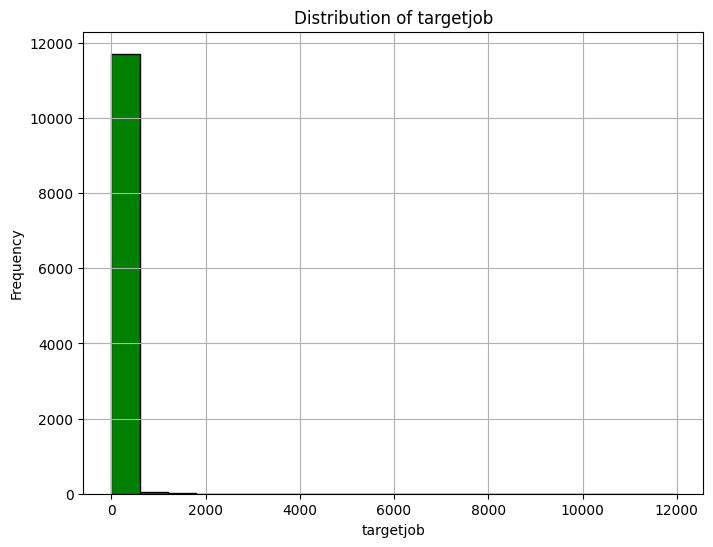

In [25]:
import matplotlib.pyplot as plt

# 히스토그램으로 목표일자리수의 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(df1['목표일자리수'], bins=20, color='GREEN', edgecolor='BLACK')
plt.title('Distribution of targetjob')
plt.xlabel('targetjob')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- 로그변환: 이상치 제거 후에도 분포 불균형 확인되어 시행

<ipython-input-26-3e61589d3fba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log_목표일자리수'] = np.log1p(df1['목표일자리수'])


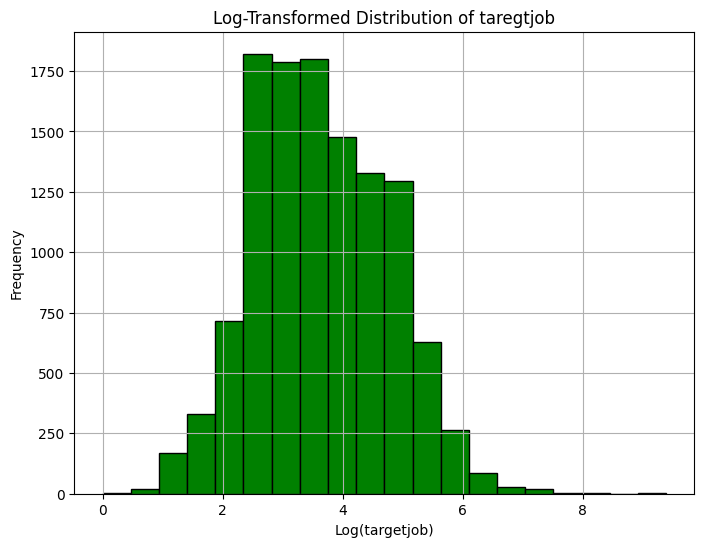

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 목표일자리수에 1을 더한 후 로그 변환 (값이 0인 경우 대비)
df1['log_목표일자리수'] = np.log1p(df1['목표일자리수'])

# 히스토그램으로 로그 변환한 목표일자리수의 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(df1['log_목표일자리수'], bins=20, color='GREEN', edgecolor='black')
plt.title('Log-Transformed Distribution of taregtjob')
plt.xlabel('Log(targetjob)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [43]:
df2 = df1.drop('목표일자리수',axis=1)
df2

,사업유형알파벳,인구밀도,log_목표일자리수
0,B,614.84,5.673323
1,B,614.84,5.673323
2,B,787.43,2.639057
3,E,15211.41,2.397895
4,A,16425.40,4.430817
...,...,...,...
11780,A,204.63,4.615121
11781,B,12299.10,1.945910
11782,E,483.62,2.484907
11783,A,31.67,4.875197


## 2. 군집화
: k-prototype이용 → 범주형 + 연속형 변수일때 사용할 수 있는 군집화방법

- 결측치
    - 사업유형알파벳은 최빈값 이용
    - 인구밀도과 목표일자리수는 평균값 사용

- 최적 클러스터 수 찾기: 엘보우 방법

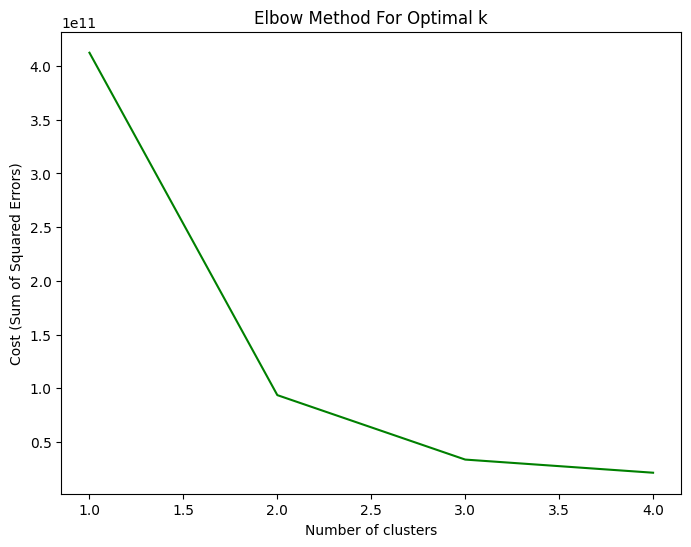

In [29]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# 범주형 열 인덱스
categorical_columns_index = [0]  # 'category_col'은 범주형 데이터

# 엘보우 방법을 통해 최적의 클러스터 수 찾기
cost = []
K = range(1, 5)  # 1부터 10개의 클러스터 개수까지 시도

for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', verbose=0)
    kproto.fit_predict(df2, categorical=categorical_columns_index)
    cost.append(kproto.cost_)

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 6))
plt.plot(K, cost, 'green')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (Sum of Squared Errors)')
plt.title('Elbow Method For Optimal k')
plt.show()


-> 최적 클러스터 개수: 2개

- 최적 클러스터 개수인 2개의 군집으로 군집화

In [44]:
# 범주형 열의 인덱스
categorical_columns_index = [0]  # 'categorical_columns_index'은 범주형 데이터

# K-Prototype 모델 정의 및 학습
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=2)
clusters = kproto.fit_predict(df2, categorical=categorical_columns_index)

# 클러스터 결과를 데이터프레임에 추가
df2['cluster'] = clusters

df2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 93569050439.46246
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1612, ncost: 99583748162.77177
Run: 2, iteration: 2/100, moves: 492, ncost: 95745185018.181
Run: 2, iteration: 3/100, moves: 337, ncost: 93924613442.87823
Run: 2, iteration: 4/100, moves: 133, ncost: 93569050439.46237
Run: 2, iteration: 5/100, moves: 0, ncost: 93569050439.46237
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 314, ncost: 93638820089.09859
Run: 3, iteration: 2/100, moves: 59, ncost: 93569050439.46239
Run: 3, iteration: 3/100, moves: 0, ncost: 93569050439.46239
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 1693, ncost: 99682429789.38214


,사업유형알파벳,인구밀도,log_목표일자리수,cluster
0,B,614.84,5.673323,0
1,B,614.84,5.673323,0
2,B,787.43,2.639057,0
3,E,15211.41,2.397895,1
4,A,16425.40,4.430817,1
...,...,...,...,...
11780,A,204.63,4.615121,0
11781,B,12299.10,1.945910,1
11782,E,483.62,2.484907,0
11783,A,31.67,4.875197,0


- 군집별 사업 유형 분포

In [45]:
df2 = pd.DataFrame(df2)

# cluster와 사업유형알파벳으로 그룹화하고 각 그룹의 개수를 계산
result = df2.groupby(['cluster', '사업유형알파벳']).size().unstack(fill_value=0)

# 결과 출력
print(result)

사업유형알파벳     A     B     E
cluster                  
0        5092  2288  1873
1        1523   562   447


- 군집 결과 시각화: PCA 시행 결과 이용

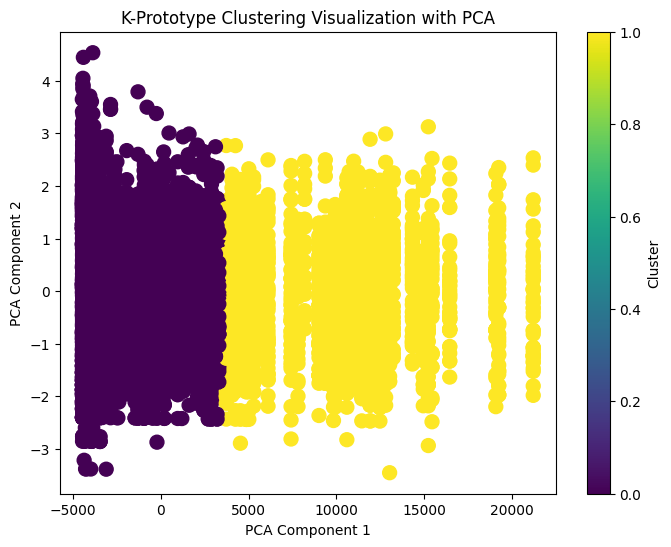

In [46]:
# 클러스터 결과를 데이터프레임에 추가
df2['cluster'] = clusters

# 범주형 데이터를 숫자로 변환하여 PCA를 수행할 수 있도록 준비
data_encoded = df2.copy()
data_encoded['사업유형알파벳'] = data_encoded['사업유형알파벳'].astype('category').cat.codes

# PCA를 사용하여 2D로 차원 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded[['사업유형알파벳', 'log_목표일자리수', '인구밀도']])

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df2['cluster'], cmap='viridis', s=100)
plt.title('K-Prototype Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

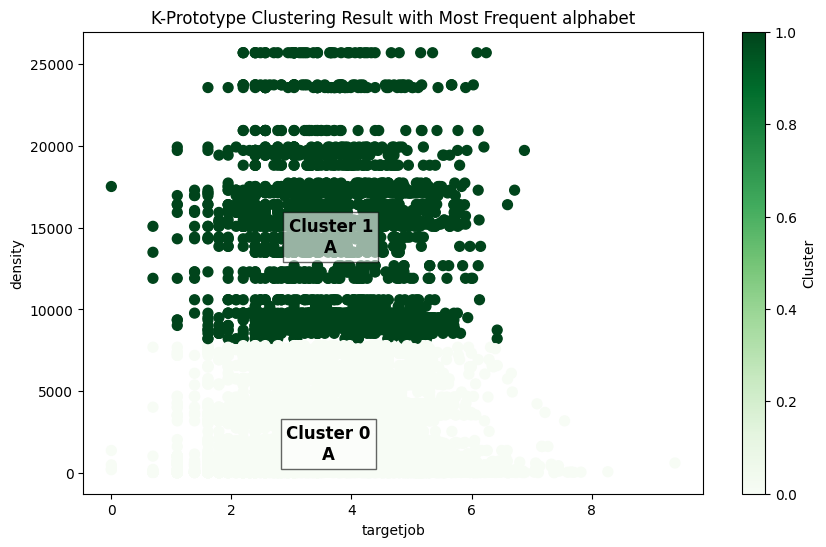

In [47]:
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳' 빈도수 계산
cluster_centroid_info = df2.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터에 대해 다른 색상으로 산점도 표시
scatter = plt.scatter(df2['log_목표일자리수'], df2['인구밀도'], c=df2['cluster'], cmap='Greens', s=50)

# 색상 막대 추가 (cluster를 색상으로 구분)
plt.colorbar(scatter, label='Cluster')

# 각 클러스터의 중심부에 가장 빈도수가 높은 '사업유형알파벳' 표시
for cluster_num, centroid_alphabet in cluster_centroid_info.items():
    # 해당 클러스터의 데이터 포인트들의 평균 좌표 (중앙에 표시)
    cluster_data = df2[df2['cluster'] == cluster_num]
    mean_x = cluster_data['log_목표일자리수'].mean()
    mean_y = cluster_data['인구밀도'].mean()

    # 텍스트 추가
    plt.text(mean_x, mean_y, f'Cluster {cluster_num}\n{centroid_alphabet}',
             fontsize=12, fontweight='bold', color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

# 축 라벨 및 제목 설정
plt.xlabel('targetjob')
plt.ylabel('density')
plt.title('K-Prototype Clustering Result with Most Frequent alphabet')

# 시각화 표시
plt.show()

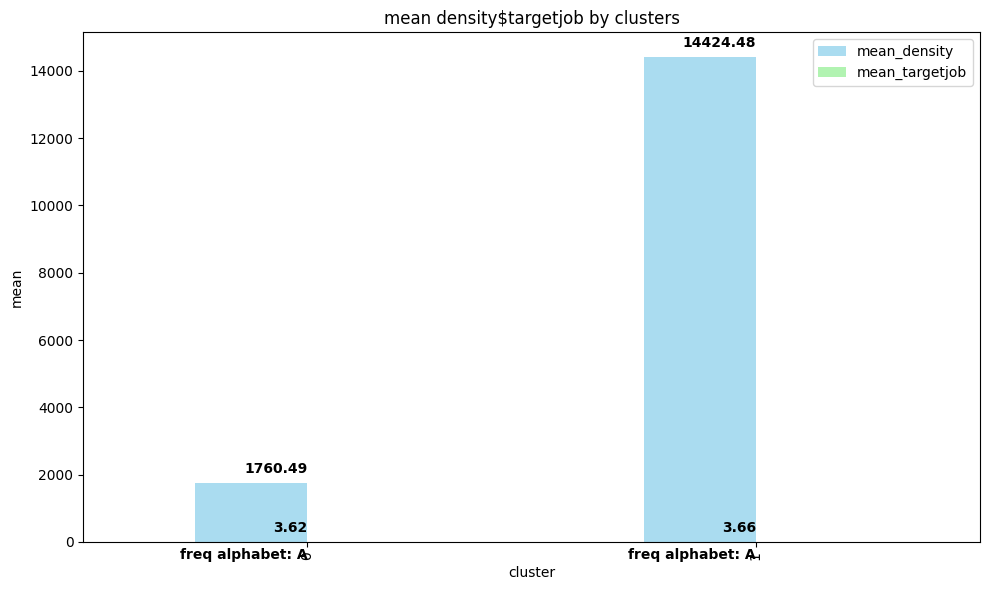

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳'의 최빈값 구하기
most_frequent_alphabet = df2.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 각 클러스터별 '인구밀도'와 'log_목표일자리수'의 평균값 구하기
cluster_means = df2.groupby('cluster')[['인구밀도', 'log_목표일자리수']].mean()

# 시각화 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 인구밀도와 log_목표일자리수 평균값 막대 그래프 그리기
cluster_means.columns = ['mean_density', 'mean_targetjob']
bars = cluster_means.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'], alpha=0.7)

# Y축 레이블 설정
ax1.set_ylabel('mean')
ax1.set_title('mean density$targetjob by clusters')

# 각 클러스터에 대한 최빈값 텍스트 표시
for idx, cluster_num in enumerate(cluster_means.index):
    most_freq = most_frequent_alphabet[cluster_num]

    # 인구밀도 막대 위에 값 표시
    mean_density = cluster_means.loc[cluster_num, 'mean_density']
    ax1.text(idx, mean_density + 300, f'{mean_density:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # log_목표일자리수 막대 위에 값 표시
    mean_targetjob = cluster_means.loc[cluster_num, 'mean_targetjob']
    ax1.text(idx, mean_targetjob + 300, f'{mean_targetjob:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 각 클러스터에 대한 최빈값 텍스트 표시 (막대 아래에)
    ax1.text(idx, -500, f'freq alphabet: {most_freq}', ha='right', fontsize=10, fontweight='bold', color='black')

# 레전드 추가
plt.legend(['mean_density', 'mean_targetjob'], loc='upper right')

# 시각화 보여주기
plt.tight_layout()
plt.show()

#### [최종 결과 분석 ]
- 클러스터 0 : 인구밀도 낮음, 목표일자리수 낮음, 최다 사업유형 = A,

- 클러스터 1 : 인구밀도 높음, 목표일자리수 상위권, 최다 사업유형 = A


### +)군집 3개 시도한 코드

In [49]:
df3 = df1.drop('목표일자리수',axis=1)

In [50]:
# 범주형 열의 인덱스
categorical_columns_index = [0]  # 'categorical_columns_index'은 범주형 데이터

# K-Prototype 모델 정의 및 학습
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=2)
clusters = kproto.fit_predict(df3, categorical=categorical_columns_index)

# 클러스터 결과를 데이터프레임에 추가
df3['cluster'] = clusters

df3

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3927, ncost: 42616946976.49036
Run: 1, iteration: 2/100, moves: 972, ncost: 34552466381.1151
Run: 1, iteration: 3/100, moves: 408, ncost: 33899955727.37485
Run: 1, iteration: 4/100, moves: 280, ncost: 33560617776.125412
Run: 1, iteration: 5/100, moves: 7, ncost: 33560357352.08293
Run: 1, iteration: 6/100, moves: 0, ncost: 33560357352.08293
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2057, ncost: 39439890538.80488
Run: 2, iteration: 2/100, moves: 699, ncost: 34384033739.20822
Run: 2, iteration: 3/100, moves: 376, ncost: 33781565266.775074
Run: 2, iteration: 4/100, moves: 213, ncost: 33560357352.082886
Run: 2, iteration: 5/100, moves: 0, ncost: 33560357352.082886
Init: initializing centroids
Init:

,사업유형알파벳,인구밀도,log_목표일자리수,cluster
0,B,614.84,5.673323,2
1,B,614.84,5.673323,2
2,B,787.43,2.639057,2
3,E,15211.41,2.397895,0
4,A,16425.40,4.430817,0
...,...,...,...,...
11780,A,204.63,4.615121,2
11781,B,12299.10,1.945910,0
11782,E,483.62,2.484907,2
11783,A,31.67,4.875197,2


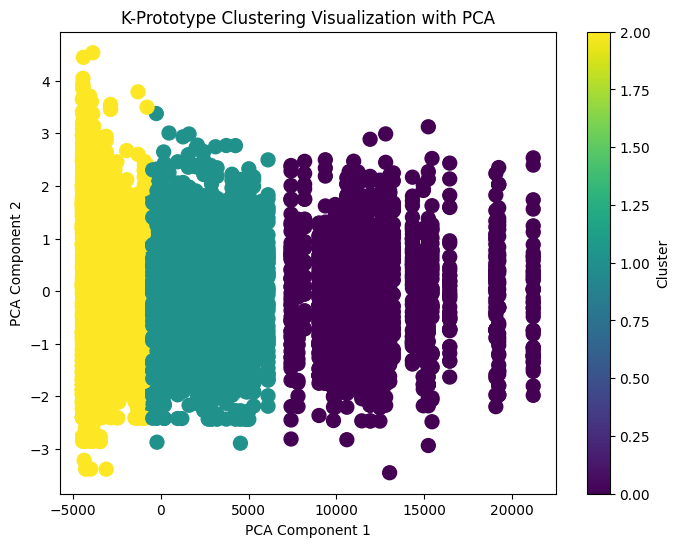

In [51]:
# 범주형 데이터를 숫자로 변환하여 PCA를 수행할 수 있도록 준비
data_encoded = df3.copy()
data_encoded['사업유형알파벳'] = data_encoded['사업유형알파벳'].astype('category').cat.codes

# PCA를 사용하여 2D로 차원 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded[['사업유형알파벳', 'log_목표일자리수', '인구밀도']])

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df3['cluster'], cmap='viridis', s=100)
plt.title('K-Prototype Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [52]:
# cluster와 사업유형알파벳으로 그룹화하고 각 그룹의 개수를 계산
result = df3.groupby(['cluster', '사업유형알파벳']).size().unstack(fill_value=0)

# 결과 출력
print(result)

사업유형알파벳     A     B     E
cluster                  
0        1063   385   311
1        1493   561   455
2        4059  1904  1554


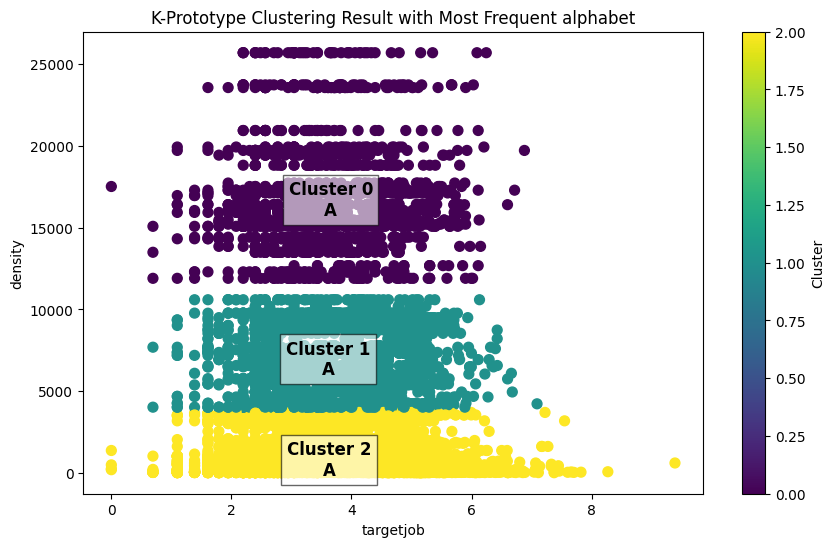

In [53]:
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳' 빈도수 계산
cluster_centroid_info = df3.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터에 대해 다른 색상으로 산점도 표시
scatter = plt.scatter(df3['log_목표일자리수'], df3['인구밀도'], c=df3['cluster'], cmap='viridis', s=50)

# 색상 막대 추가 (cluster를 색상으로 구분)
plt.colorbar(scatter, label='Cluster')

# 각 클러스터의 중심부에 가장 빈도수가 높은 '사업유형알파벳' 표시
for cluster_num, centroid_alphabet in cluster_centroid_info.items():
    # 해당 클러스터의 데이터 포인트들의 평균 좌표 (중앙에 표시)
    cluster_data = df3[df3['cluster'] == cluster_num]
    mean_x = cluster_data['log_목표일자리수'].mean()
    mean_y = cluster_data['인구밀도'].mean()

    # 텍스트 추가
    plt.text(mean_x, mean_y, f'Cluster {cluster_num}\n{centroid_alphabet}',
             fontsize=12, fontweight='bold', color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

# 축 라벨 및 제목 설정
plt.xlabel('targetjob')
plt.ylabel('density')
plt.title('K-Prototype Clustering Result with Most Frequent alphabet')

# 시각화 표시
plt.show()

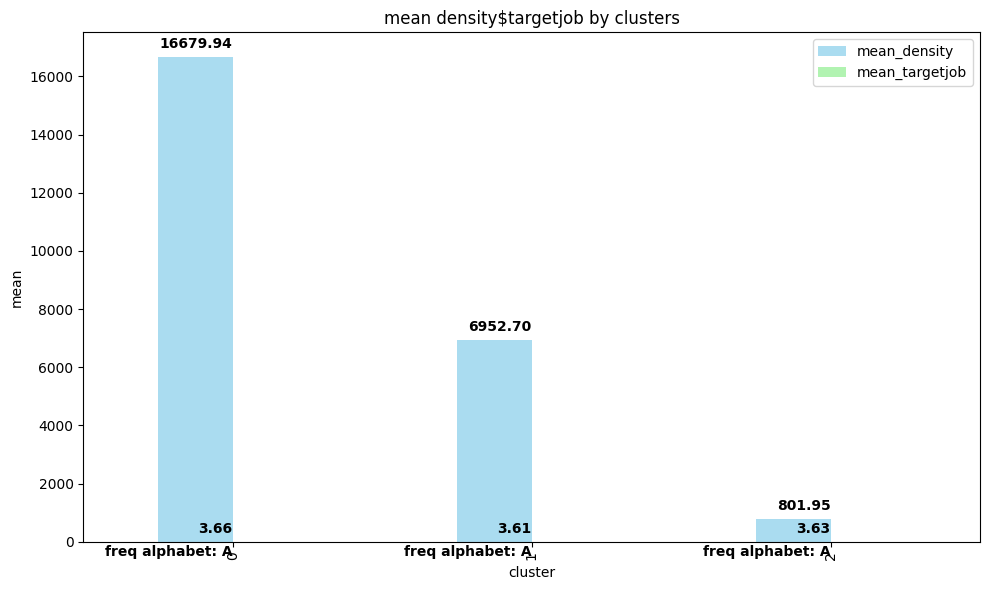

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳'의 최빈값 구하기
most_frequent_alphabet = df3.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 각 클러스터별 '인구밀도'와 'log_목표일자리수'의 평균값 구하기
cluster_means = df3.groupby('cluster')[['인구밀도', 'log_목표일자리수']].mean()

# 시각화 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 인구밀도와 log_목표일자리수 평균값 막대 그래프 그리기
cluster_means.columns = ['mean_density', 'mean_targetjob']
bars = cluster_means.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'], alpha=0.7)

# Y축 레이블 설정
ax1.set_ylabel('mean')
ax1.set_title('mean density$targetjob by clusters')

# 각 클러스터에 대한 최빈값 텍스트 표시
for idx, cluster_num in enumerate(cluster_means.index):
    most_freq = most_frequent_alphabet[cluster_num]

    # 인구밀도 막대 위에 값 표시
    mean_density = cluster_means.loc[cluster_num, 'mean_density']
    ax1.text(idx, mean_density + 300, f'{mean_density:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # log_목표일자리수 막대 위에 값 표시
    mean_targetjob = cluster_means.loc[cluster_num, 'mean_targetjob']
    ax1.text(idx, mean_targetjob + 300, f'{mean_targetjob:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 각 클러스터에 대한 최빈값 텍스트 표시 (막대 아래에)
    ax1.text(idx, -500, f'freq alphabet: {most_freq}', ha='right', fontsize=10, fontweight='bold', color='black')

# 레전드 추가
plt.legend(['mean_density', 'mean_targetjob'], loc='upper right')

# 시각화 보여주기
plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.get_dummies(df2, columns=['사업유형알파벳'],dtype = int)
df2

# 클러스터별 평균값 계산
cluster_means = df2[[ '인구밀도', '사업유형알파벳_A', '사업유형알파벳_B','사업유형알파벳_E', 'cluster']].groupby('cluster').mean()

# 결과 출력
print(cluster_means)

                 인구밀도  사업유형알파벳_A  사업유형알파벳_B  사업유형알파벳_E
cluster                                               
0         6952.696006   0.595058   0.223595   0.181347
1        16679.942064   0.604321   0.218874   0.176805
2          801.948652   0.539976   0.253293   0.206731


#### [분석 결과]

- 클러스터 0 : 인구밀도 높음, 목표일자리수 상위권, 최다 사업유형 = A,

- 클러스터 1 : 인구밀도 중간, 목표일자리수 하위권, 최다 사업유형 = A

- 클러스터 2 : 인구밀도 낮음, 목표일자리수 중위권, 최다 사업유형 = A

In [55]:
df3

,사업유형알파벳,인구밀도,log_목표일자리수,cluster
0,B,614.84,5.673323,2
1,B,614.84,5.673323,2
2,B,787.43,2.639057,2
3,E,15211.41,2.397895,0
4,A,16425.40,4.430817,0
...,...,...,...,...
11780,A,204.63,4.615121,2
11781,B,12299.10,1.945910,0
11782,E,483.62,2.484907,2
11783,A,31.67,4.875197,2


### ++) 로그변환 안한 데이터로 군집화

In [56]:
 # 범주형 열의 인덱스
categorical_columns_index = [0]  # 'categorical_columns_index'은 범주형 데이터

# K-Prototype 모델 정의 및 학습
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=2)
clusters = kproto.fit_predict(df1, categorical=categorical_columns_index)

# 클러스터 결과를 데이터프레임에 추가
df1['cluster'] = clusters

df1

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 593, ncost: 95367458380.88057
Run: 1, iteration: 2/100, moves: 277, ncost: 93887384836.89273
Run: 1, iteration: 3/100, moves: 29, ncost: 93870616696.51712
Run: 1, iteration: 4/100, moves: 0, ncost: 93870616696.51712
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 866, ncost: 96996103855.52077
Run: 2, iteration: 2/100, moves: 343, ncost: 95169033316.93872
Run: 2, iteration: 3/100, moves: 285, ncost: 93872365122.27621
Run: 2, iteration: 4/100, moves: 9, ncost: 93870616696.51689
Run: 2, iteration: 5/100, moves: 0, ncost: 93870616696.51689
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 603, ncost: 98336244417.99411
Run: 3, iteration: 2/100, moves: 421, ncost: 94254464261.71576
Run: 3, iteration: 3/100, moves: 146, ncost: 93875714246.1443
Run: 3, iter

<ipython-input-56-f6b552c1a9c0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = clusters


,사업유형알파벳,목표일자리수,인구밀도,log_목표일자리수,cluster
0,B,290,614.84,5.673323,0
1,B,290,614.84,5.673323,0
2,B,13,787.43,2.639057,0
3,E,10,15211.41,2.397895,1
4,A,83,16425.40,4.430817,1
...,...,...,...,...,...
11780,A,100,204.63,4.615121,0
11781,B,6,12299.10,1.945910,1
11782,E,11,483.62,2.484907,0
11783,A,130,31.67,4.875197,0


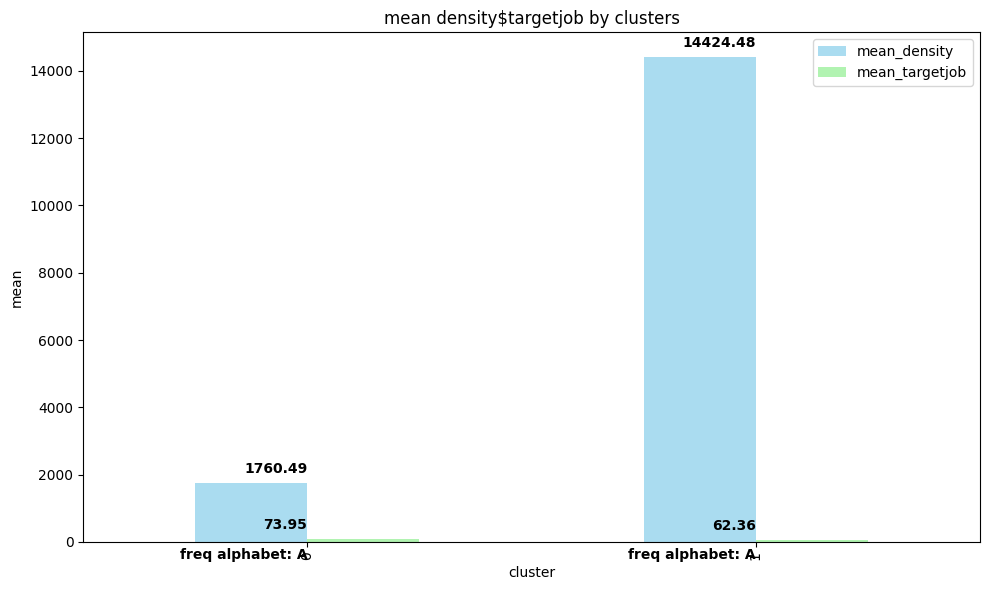

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳'의 최빈값 구하기
most_frequent_alphabet = df1.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 각 클러스터별 '인구밀도'와 'log_목표일자리수'의 평균값 구하기
cluster_means = df1.groupby('cluster')[['인구밀도', '목표일자리수']].mean()

# 시각화 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 인구밀도와 log_목표일자리수 평균값 막대 그래프 그리기
cluster_means.columns = ['mean_density', 'mean_targetjob']
bars = cluster_means.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'], alpha=0.7)

# Y축 레이블 설정
ax1.set_ylabel('mean')
ax1.set_title('mean density$targetjob by clusters')

# 각 클러스터에 대한 최빈값 텍스트 표시
for idx, cluster_num in enumerate(cluster_means.index):
    most_freq = most_frequent_alphabet[cluster_num]

    # 인구밀도 막대 위에 값 표시
    mean_density = cluster_means.loc[cluster_num, 'mean_density']
    ax1.text(idx, mean_density + 300, f'{mean_density:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # log_목표일자리수 막대 위에 값 표시
    mean_targetjob = cluster_means.loc[cluster_num, 'mean_targetjob']
    ax1.text(idx, mean_targetjob + 300, f'{mean_targetjob:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 각 클러스터에 대한 최빈값 텍스트 표시 (막대 아래에)
    ax1.text(idx, -500, f'freq alphabet: {most_freq}', ha='right', fontsize=10, fontweight='bold', color='black')

# 레전드 추가
plt.legend(['mean_density', 'mean_targetjob'], loc='upper right')

# 시각화 보여주기
plt.tight_layout()
plt.show()

<ipython-input-58-8513eed5296d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = clusters


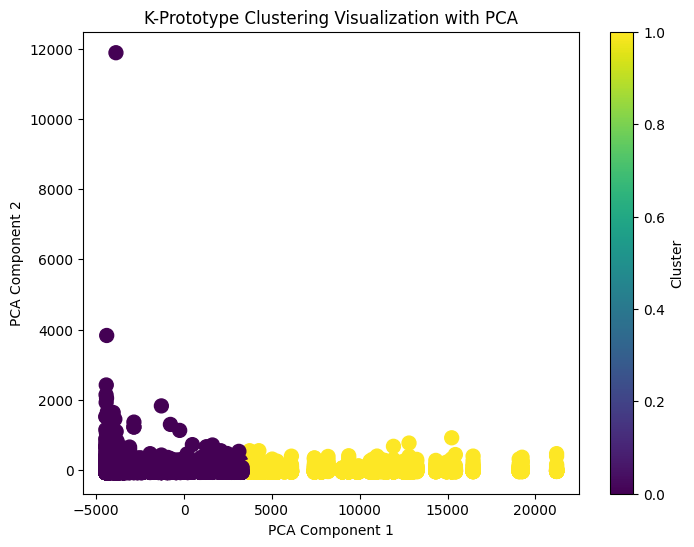

In [58]:
# 클러스터 결과를 데이터프레임에 추가
df1['cluster'] = clusters

# 범주형 데이터를 숫자로 변환하여 PCA를 수행할 수 있도록 준비
data_encoded = df1.copy()
data_encoded['사업유형알파벳'] = data_encoded['사업유형알파벳'].astype('category').cat.codes

# PCA를 사용하여 2D로 차원 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded[['사업유형알파벳', '목표일자리수', '인구밀도']])

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df1['cluster'], cmap='viridis', s=100)
plt.title('K-Prototype Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

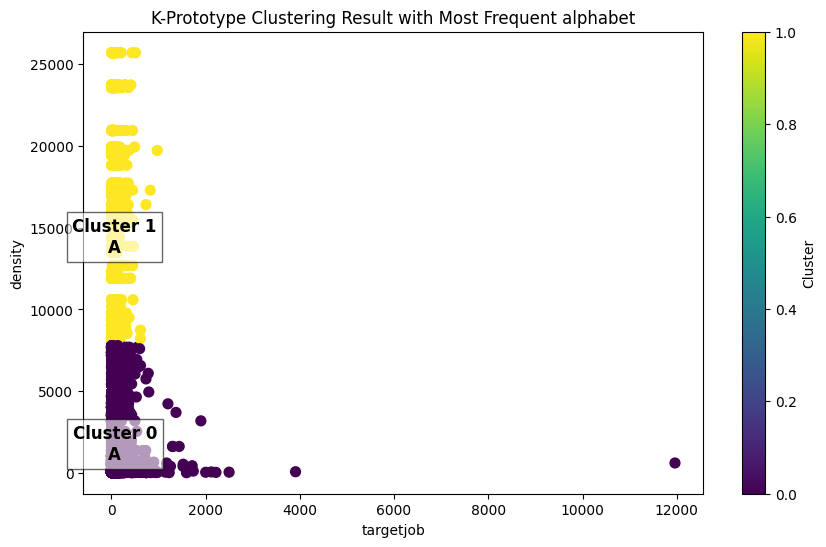

In [59]:
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳' 빈도수 계산
cluster_centroid_info = df1.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))

# 각 클러스터에 대해 다른 색상으로 산점도 표시
scatter = plt.scatter(df1['목표일자리수'], df1['인구밀도'], c=df1['cluster'], cmap='viridis', s=50)

# 색상 막대 추가 (cluster를 색상으로 구분)
plt.colorbar(scatter, label='Cluster')

# 각 클러스터의 중심부에 가장 빈도수가 높은 '사업유형알파벳' 표시
for cluster_num, centroid_alphabet in cluster_centroid_info.items():
    # 해당 클러스터의 데이터 포인트들의 평균 좌표 (중앙에 표시)
    cluster_data = df1[df1['cluster'] == cluster_num]
    mean_x = cluster_data['목표일자리수'].mean()
    mean_y = cluster_data['인구밀도'].mean()

    # 텍스트 추가
    plt.text(mean_x, mean_y, f'Cluster {cluster_num}\n{centroid_alphabet}',
             fontsize=12, fontweight='bold', color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

# 축 라벨 및 제목 설정
plt.xlabel('targetjob')
plt.ylabel('density')
plt.title('K-Prototype Clustering Result with Most Frequent alphabet')

# 시각화 표시
plt.show()


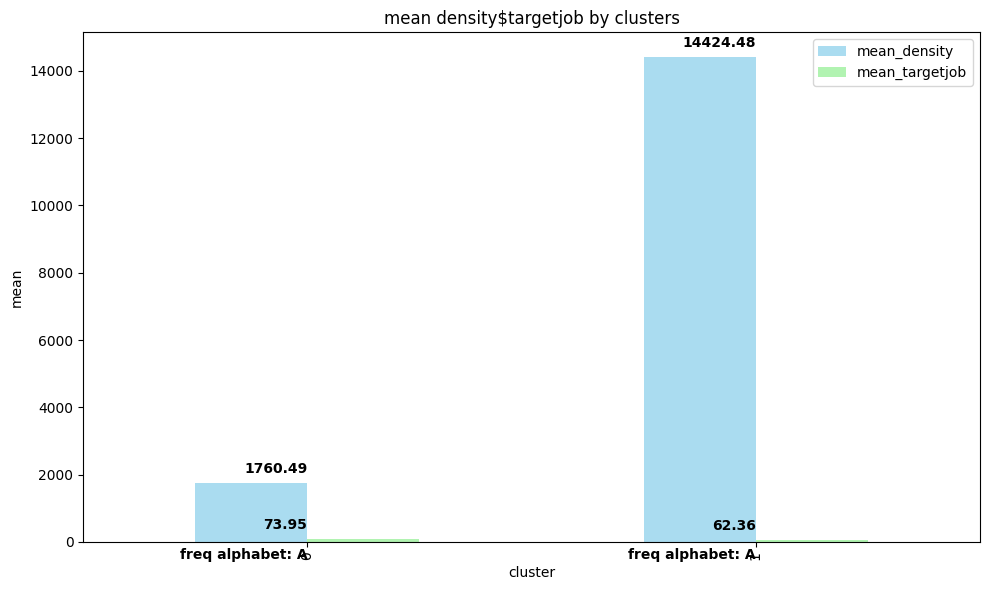

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 클러스터별로 '사업유형알파벳'의 최빈값 구하기
most_frequent_alphabet = df1.groupby('cluster')['사업유형알파벳'].agg(lambda x: x.value_counts().index[0])

# 각 클러스터별 '인구밀도'와 '목표일자리수'의 평균값 구하기
cluster_means = df1.groupby('cluster')[['인구밀도', '목표일자리수']].mean()

# 시각화 준비
fig, ax1 = plt.subplots(figsize=(10, 6))

# 인구밀도와 목표일자리수 평균값 막대 그래프 그리기
cluster_means.columns = ['mean_density', 'mean_targetjob']
bars = cluster_means.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'], alpha=0.7)

# Y축 레이블 설정
ax1.set_ylabel('mean')
ax1.set_title('mean density$targetjob by clusters')

# 각 클러스터에 대한 최빈값 텍스트 표시
for idx, cluster_num in enumerate(cluster_means.index):
    most_freq = most_frequent_alphabet[cluster_num]

    # 인구밀도 막대 위에 값 표시
    mean_density = cluster_means.loc[cluster_num, 'mean_density']
    ax1.text(idx, mean_density + 300, f'{mean_density:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 목표일자리수 막대 위에 값 표시
    mean_targetjob = cluster_means.loc[cluster_num, 'mean_targetjob']
    ax1.text(idx, mean_targetjob + 300, f'{mean_targetjob:.2f}', ha='right', color='black', fontsize=10, fontweight='bold')

    # 각 클러스터에 대한 최빈값 텍스트 표시 (막대 아래에)
    ax1.text(idx, -500, f'freq alphabet: {most_freq}', ha='right', fontsize=10, fontweight='bold', color='black')

# 레전드 추가
plt.legend(['mean_density', 'mean_targetjob'], loc='upper right')

# 시각화 보여주기
plt.tight_layout()
plt.show()
